In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
## Create the dataset
data = {
    'Year': [2019, 2020, 2021, 2022, 2023],
    'Fraud_Cases': [5100, 6450, 7200, 8900, 9600],
    'Amount_Lost_Cr': [350, 410, 475, 590, 620],
    'Cyber_Incidents': [1800, 2500, 3200, 4300, 5000],
    'Digital_Access_%': [58.3, 65.4, 72.1, 79.6, 83.2]
}
df = pd.DataFrame(data)
df.head()

,Year,Fraud_Cases,Amount_Lost_Cr,Cyber_Incidents,Digital_Access_%
0,2019,5100,350,1800,58.3
1,2020,6450,410,2500,65.4
2,2021,7200,475,3200,72.1
3,2022,8900,590,4300,79.6
4,2023,9600,620,5000,83.2


In [3]:
## Descriptive statistics
df.describe()

,Year,Fraud_Cases,Amount_Lost_Cr,Cyber_Incidents,Digital_Access_%
count,5.000000,5.000000,5.000000,5.000000,5.00000
mean,2021.000000,7450.000000,489.000000,3360.000000,71.72000
std,1.581139,1824.143635,115.238882,1301.153335,10.17433
min,2019.000000,5100.000000,350.000000,1800.000000,58.30000
25%,2020.000000,6450.000000,410.000000,2500.000000,65.40000
50%,2021.000000,7200.000000,475.000000,3200.000000,72.10000
75%,2022.000000,8900.000000,590.000000,4300.000000,79.60000
max,2023.000000,9600.000000,620.000000,5000.000000,83.20000


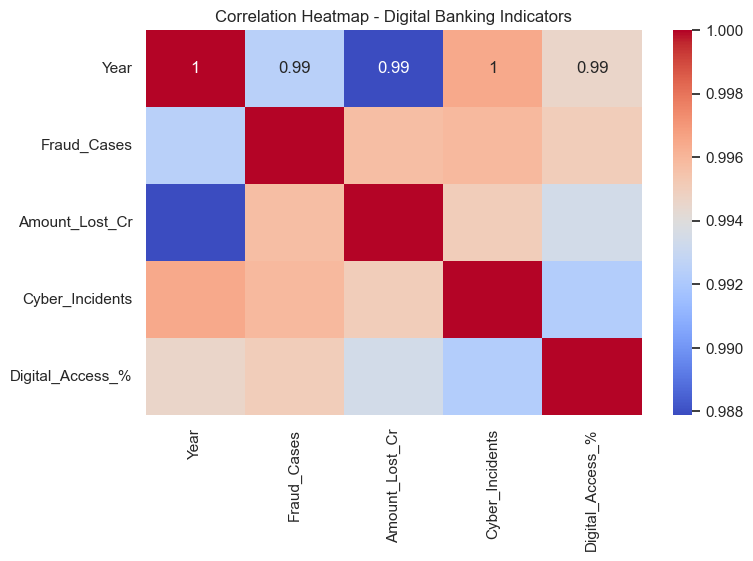

In [4]:
## Correlation analysis
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Digital Banking Indicators')
plt.show()

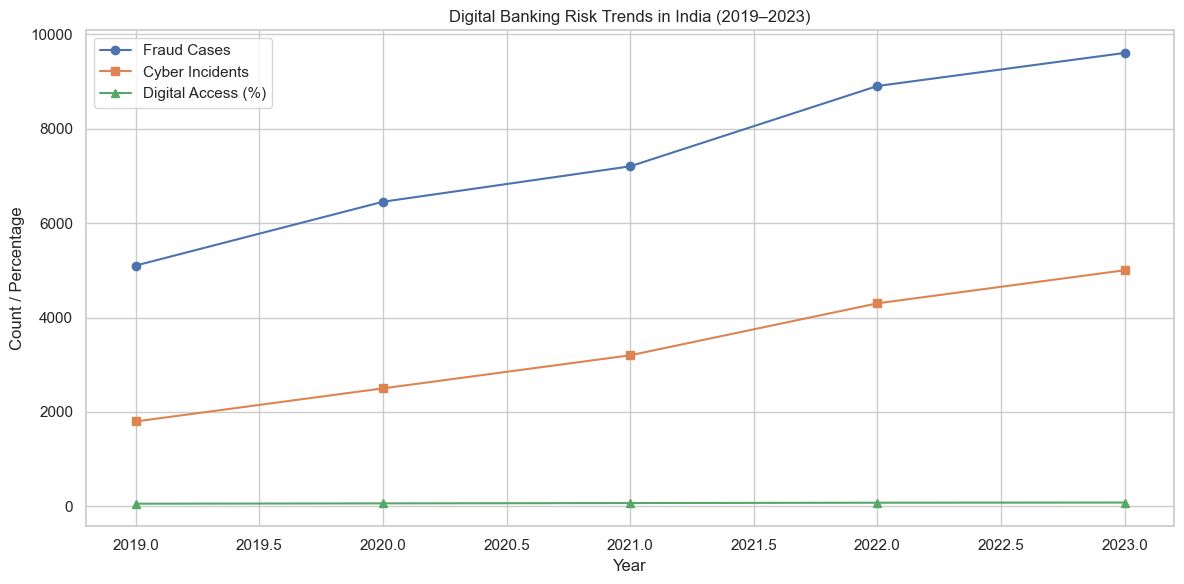

In [5]:
## Time trend visualization
plt.figure(figsize=(12,6))
plt.plot(df['Year'], df['Fraud_Cases'], marker='o', label='Fraud Cases')
plt.plot(df['Year'], df['Cyber_Incidents'], marker='s', label='Cyber Incidents')
plt.plot(df['Year'], df['Digital_Access_%'], marker='^', label='Digital Access (%)')
plt.xlabel('Year')
plt.ylabel('Count / Percentage')
plt.title('Digital Banking Risk Trends in India (2019–2023)')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
## Compute a simple Digital Banking Risk Index
df['Risk_Index'] = (df['Fraud_Cases'] / df['Digital_Access_%']) + (df['Cyber_Incidents'] / 100)
df[['Year', 'Risk_Index']]

,Year,Risk_Index
0,2019,105.478559
1,2020,123.623853
2,2021,131.861304
3,2022,154.809045
4,2023,165.384615


In [8]:
## Machine Learning: Fraud Risk Classification
#We simulate a model predicting whether a year is a high-risk year based on digital access, cyber incidents, and amount lost.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Label high-risk years (manually here for demo purposes)
df['High_Risk'] = [0, 0, 1, 1, 1]  # Simulated
features = ['Digital_Access_%', 'Cyber_Incidents', 'Amount_Lost_Cr']
X = df[features]
y = df['High_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

